In [3]:
#load the libraries
!pip install sweetviz 


  Using cached sweetviz-2.1.3-py3-none-any.whl (15.1 MB)


In [32]:
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data=pd.read_csv("C:/Users/Win/Desktop/DS project/bank.csv")

In [34]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [35]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [36]:
data.shape

(250, 7)

In [37]:
#data types
data.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [39]:
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

<AxesSubplot:>

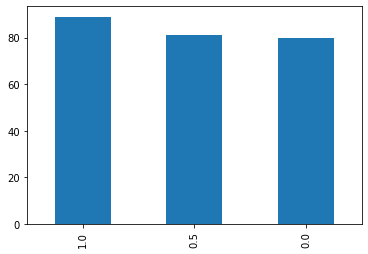

In [40]:
data['industrial_risk'].value_counts().plot.bar()

<AxesSubplot:>

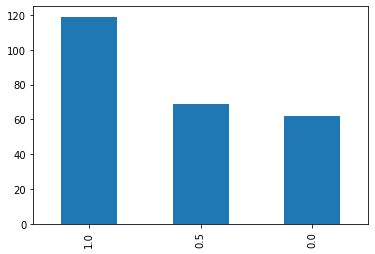

In [41]:
data['management_risk'].value_counts().plot.bar()

<AxesSubplot:>

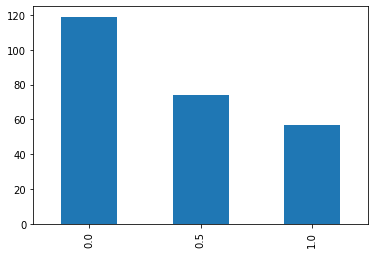

In [42]:
data['financial_flexibility'].value_counts().plot.bar()

<AxesSubplot:>

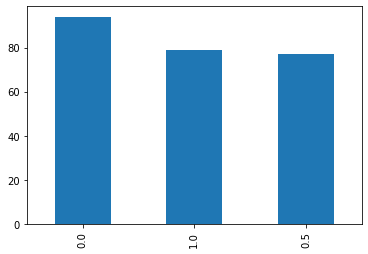

In [43]:
data['credibility'].value_counts().plot.bar()

<AxesSubplot:>

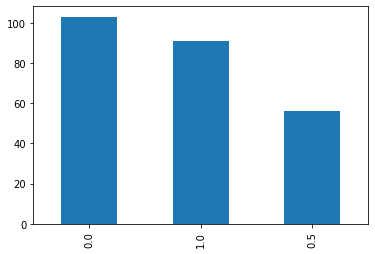

In [44]:
data['competitiveness'].value_counts().plot.bar()

<AxesSubplot:>

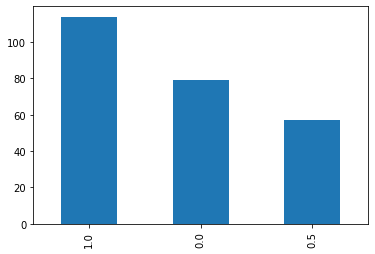

In [45]:
data['operating_risk'].value_counts().plot.bar()

<AxesSubplot:>

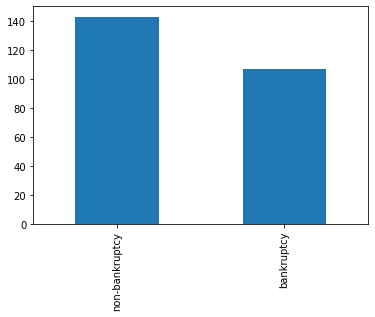

In [46]:
data['class'].value_counts().plot.bar()

<AxesSubplot:>

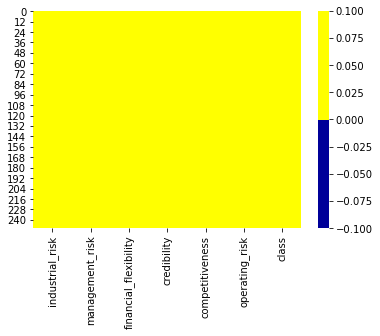

In [47]:
#checking missing values using heatmap
cols = data.columns 
colours = ['#000099', '#ffff00']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [48]:
data[data.isnull().any(axis=1)].head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class


In [50]:
# there is no any missing  values in our data set

# Univariate histogram and Correlation analysis

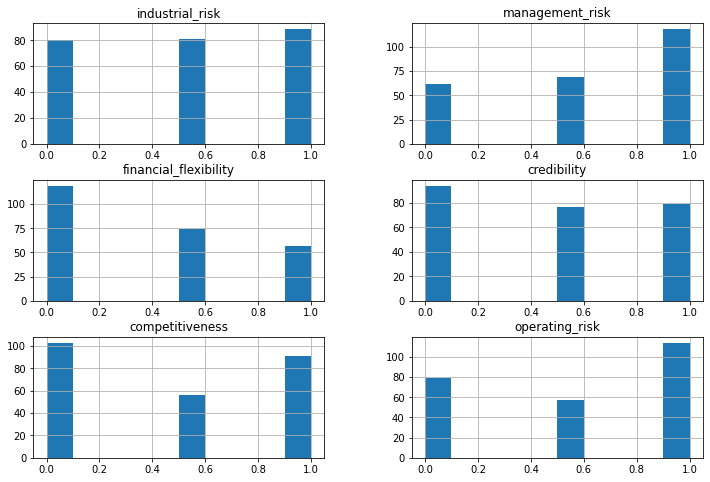

In [57]:
# Univariate Histograms
from matplotlib import pyplot

data.hist(figsize=(12, 8))
pyplot.show()

In [54]:
#Correlation

correlation=data.corr()
correlationlation

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


<AxesSubplot:>

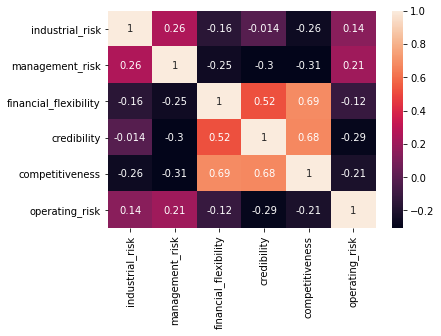

In [56]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

# Transformations

In [53]:
#class variable has object type data so we need to convert it into binary data

In [59]:
data['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [60]:
data['class'] = data['class'].astype("category")

In [61]:
# Encoding the categorical columns by using label encoder

In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [63]:
data['class'] = label_encoder.fit_transform(data['class'])


In [64]:
data['class']

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int32

In [65]:
# let consider bankruptcy=0 and non-bankrupcy=1

In [66]:
# Rescale data (between x and y)
import pandas as pd
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = data.values
# separate array into input and output components
X = array[:,1:6]
Y = array[:,6]

scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.5 0.  1. ]
 [1.  0.  0.  0.  1. ]]


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


# Data Standardization

In [69]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
array = data.values
# separate array into input and output components
X = array[:,0:6]
Y = array[:,6]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.044  0.942 -0.938 -1.133 -1.082 -0.161]
 [-1.261  0.942 -0.938 -1.133 -1.082  0.991]
 [ 1.174 -1.498 -0.938 -1.133 -1.082  0.991]
 [-0.044 -1.498 -0.938  0.072 -1.082  0.991]
 [ 1.174  0.942 -0.938 -1.133 -1.082  0.991]]


# Feature Engineering- Method1

In [70]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = data.values
X = array[:,0:6]
Y = array[:,6]
# feature extraction
model = LogisticRegression(max_iter=200)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

fit.n_features_
fit.support_
fit.ranking_



array([2, 1, 1, 1, 1, 3])

# Feature Engineering- Method2

In [71]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

array = data.values
X = array[:,0:6]
Y = array[:,6]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

[0.018 0.031 0.234 0.214 0.48  0.023]


In [72]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
